<center><h1><b>STATISTICS AND INFERENCE</b></h1></center>

In [1]:
library(png)
library(grid)

---

# 01 - INTRODUCTION TO DISTRIBUTIONS

There are two basic types of distributions: discrete distributions and continuous distributions.
* **Discrete distribution**: finite or countable set of possible outcomes of the random variable. They are represneted by probability mass functions (**PMF**).
* **Continuous distribution**: a random variable can have outcomes in an interval of the real line. They are represented by probability density functions (**PDF**)


#### MEAN AND VARIANCE
The expectation, mean, average or **expected value** reflects the location of a distribution:
$$ E[X] = \sum_i x_i \, p(x_i) \quad \text{for the discrete case} $$
$$ E[X] = \int_{-\infty}^{+\infty} x \, f(x) \, dx  \quad \text{for the continuous case} $$

The **variance** reflects the dispersion of the distribution:
$$ \operatorname{var}(X) = E\left[(X - E[X])^2\right] = E[X^2] - (E[X])^2 $$

#### PROPERTIES
$$ E[a + bX] = a + bE[X] $$
$$ E[X + Y] = E[X] + E[Y] $$
$$ \operatorname{var}(a + bX) = b^2 \operatorname{var}(X) $$
$$ \operatorname{var}(X + Y) = \operatorname{var}(X) + \operatorname{var}(Y) + 2 \, \operatorname{cov}(X, Y) $$
$$ \operatorname{cov}(X, Y) = E\left[(X - E[X])(Y - E[Y])\right] = E[XY] - E[X]E[Y] $$

#### MOMENTS OF A DISTRIBUTION
They are analogous to the center-of-mass and to the moment of inertia.  
Algebraic Moments are the moment of order $k$ about the origin:
$$ \mu'_k = E[X^k] = \sum_j x_j^k \, p_j \quad \text{for the discrete case}  $$
$$ \mu'_k = E[X^k] = \int x^k f(x) \, dx  \quad \text{for the continuous case} $$

Central Moments are the moment of order $k$ about the mean:
$$ \mu_k = E[(X - \mu)^k] = \sum_j (x_j - \mu)^k \, p_j \quad \text{for the discrete case} $$
$$ \mu_k = E[(X - \mu)^k] = \int (x - \mu)^k f(x) \, dx \quad \text{for the continuous case} $$


For a symmetric distribution, all **odd** central moments vanish. Non-zero values of odd moments can indicate **skewness** in a distribution, i.e. a measure of the asymmetry of a probability distribution around its mean. It tells you whether the data is symmetrically distributed, or if it has a longer tail on one side.

#### CDF
The cumulative distribution function (**CDF**) is defined by: $ F(x) = P(X ≤ x) $. In particular:
$$ F(x_j) = P(X ≤ x_j) = \sum_{i≤j} p_i  \quad \text{for the discrete case} $$
$$ F(x) = P(X ≤ x) = \int_{-\infty}^x p(u) \, du \quad \text{for the continuous case} $$

With distribution functions, we compute the probability for intervals $(c, d]$ as:

$$
P(c < X \leq d) = P(X \leq d) - P(X \leq c) = F(d) - F(c) $$

#### PDF IN R
In R all standard distributions are available.  
Naming convention: a **core name** is associated with each distribution, and a **prefix** is added to indicate one of the four basic functions:
- `d` for the **probability density function** (pdf)  
- `p` for the **cumulative distribution function** (cdf)  
- `q` for the **quantile function**  (that is the inverse of the cdf)
- `r` for **random sampling** from the distribution

For example, for the normal distribution, the functions are: `dnorm()`, `pnorm()`, `qnorm()`, `rnorm()`

NOTE:  
The **CDF** gives the probability that a random variable $X$ is less than or equal to a certain value $\alpha$, i.e. it returns $P(X≤\alpha)$  
The **QUANTILE** function does the reverse: it returns the value $\alpha$ such that the probability equals some value $p$, so $P(X≤\alpha)=p$, for a given probability $p \in [0,1] $.

In [5]:
# What is the probability that a value from a standard normal distribution is less than 1.64?
pnorm(1.64)

# What is the value α such that P(X≤α)=0.95 for a standard normal distribution?
qnorm(0.95)

[1] 0.9494974

[1] 1.644854

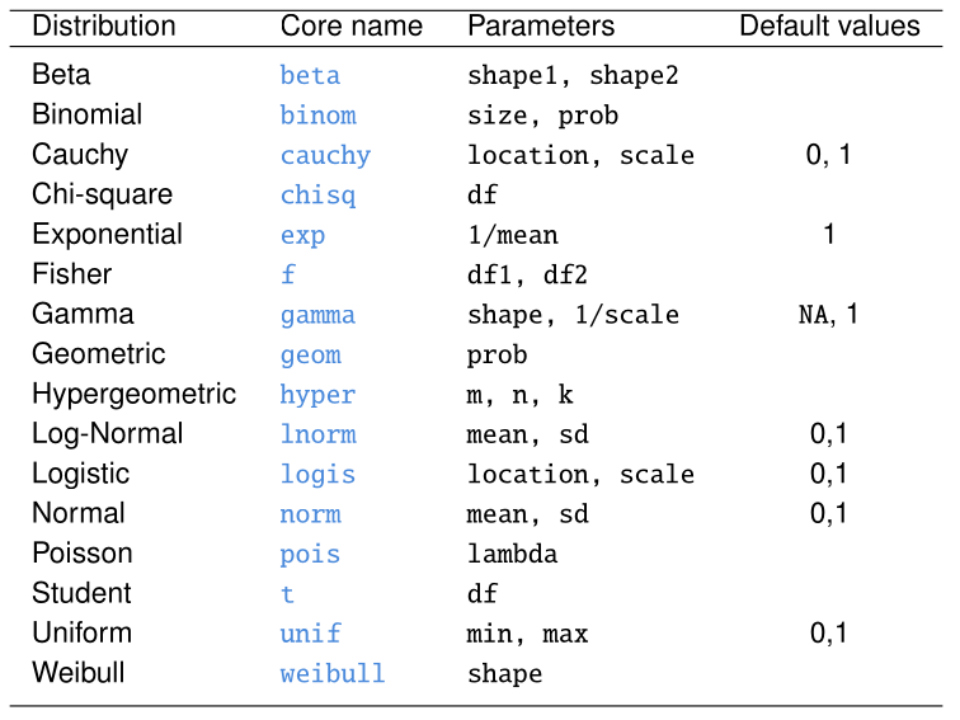

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
img <- readPNG("./images/pdf_in_R.png"); grid.raster(img)

---

# 02 - DISCRETE DISTRIBUTIONS

---

## BERNOULLI PROCESS
A Bernoulli process is a random experiment with **only two possible outcomes**: success and failure. If we assign the values $1$ to success and $0$ to failure, then the random variable $ X \in \{0, 1\} $, and:
- Success with probability $ p $: $$ P(X = 1) = p $$
- Failure with probability $ 1 - p $, often denoted as $ q $, where $ q = 1 - p $: $$ P(X = 0) = 1 - p = q $$


The expected value and variance of $X$ are:

$$
E[X] = p
$$

$$
\text{Var}(X) = p(1 - p)
$$

Examples:
* Tossing a coin (e.g., heads = 1, tails = 0)  
* Drawing from a die and checking if the result matches a specific number (e.g., success = rolling a 6)


In [17]:
# example: probability of obatining 6 from a die
p <- 1/6
exp_value <- p; round(exp_value,3)
var <- p*(1-p); round(var, 3)

[1] 0.167

[1] 0.139

---

## BINOMIAL DISTIRBUTION
The **sum of $n$ independent Bernoulli trials** follows a Binomial distribution.  
It give us the probability of obtaining exactly $x$ successes in $n$ independent trials, each with success probability $p$:

$$
B(x| p, n) = \binom{n}{x} p^x (1 - p)^{n - x}
$$

The expected value and variance of a Binomial random variable $X$ are:

$$
E[X] = np
$$

$$
\text{Var}(X) = np(1 - p)
$$

Properties:
* The distribution is symmetric when $p = \frac{1}{2}$
* When $p \ne \frac{1}{2}$, the distribution is skewed
* As $n$ increases, the distribution becomes more symmetric, and for large $n$, it approximates a Gaussian (normal) distribution

Examples:
* Tossing a coin $n$ times and counting the number of heads  
* Throwing multiple dice and counting how many times a certain value appears  
* Drawing $x$ red balls from an urn containing a known proportion of red and white balls (with replacement)

CODE EXAMPLE:  
In a restaurant 8 entrees of fish, 12 of beef and 10 of poultry are served. What is the probability that 2 of the 4 next customers order fish entrees ?

P(2 | np) = 0.229451851851852 


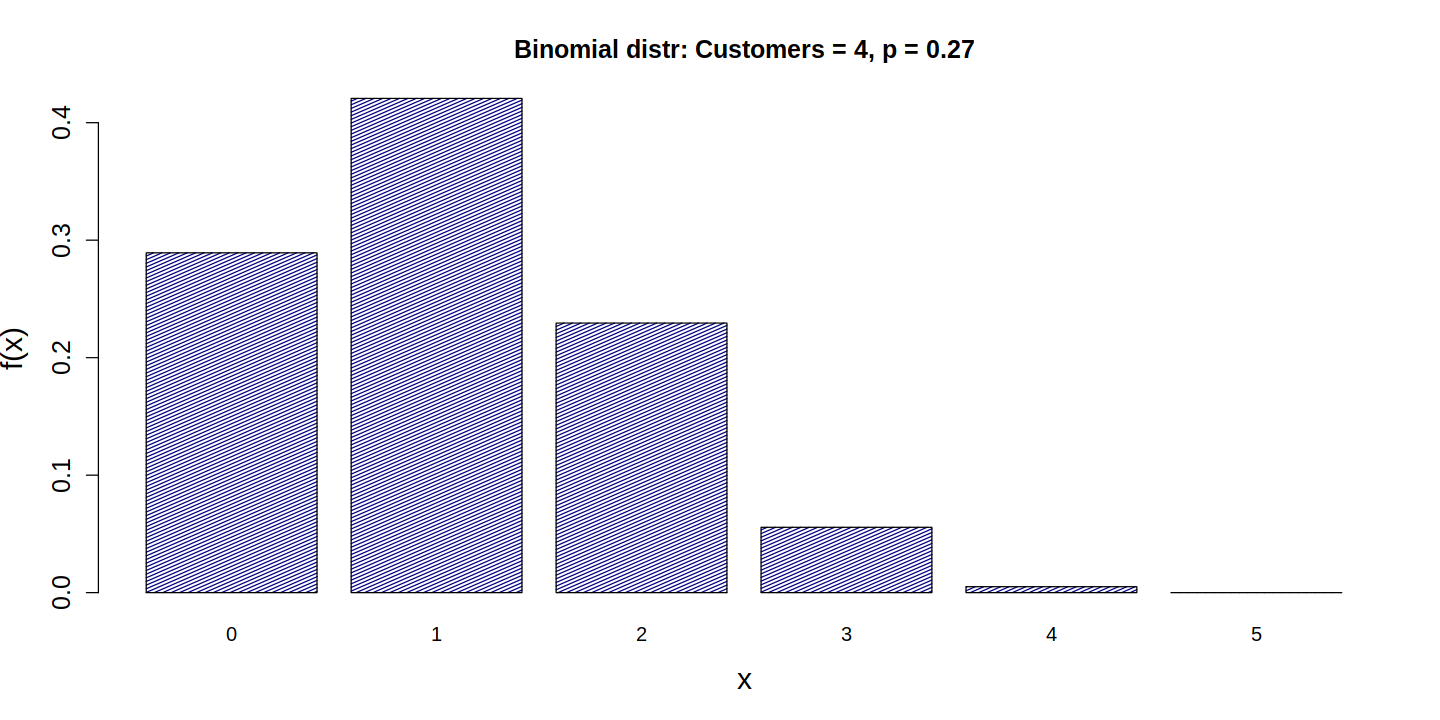

In [35]:
cust <- 4
p <- 8/30
x <- 0:5
ap <- dbinom(x, cust, p)

options(repr.plot.width = 12, repr.plot.height = 6)
barplot( ap,  names.arg = x,   col = "navy",  xlab = "x",  ylab = "f(x)",  density = 40,
  main = sprintf("Binomial distr: Customers = %d, p = %.2f", cust, p),   cex.lab = 1.5,  cex.axis = 1.25, cex.main = 1.25,  cex.sub = 1.5)

cat(paste("P(2 | np) =", ap[3], "\n"))

---

## GEOMETRIC DISTRIBUTION
The geometric distribution gives the number of Bernoulli trials to get the first success. In R we use `dgeom(x,p)`.  
Calling $x$ the number of failures before success (definition used in R), with $x \in {0,1,2..}$, and $p$ the probability of success of a single trial, we have:
$$ Geo(x|p)= p(1-p)^x  $$

Instead if we want to compute $x$ as the number of trials to obtain success, we use $x-1$ in the exponent, with $x \in {1,2,3..}$:
$$ Geo(x|p)= p(1-p)^{x-1}  $$

The expected value and variance are:
$$
E[X] = \frac{1}{p}
$$

$$
\text{Var}(X) = \frac{1-p}{p^2}
$$

Useful results:
$$ P(x ≤ r) = 1 − (1 − p)r = qr $$ 
$$ P(x > r) = 1 − qr $$

In [27]:
# EXAMPLE: COIN TOSS, guessing when I will draw head
p <- 1/2
exp_value <- 1/p; round(exp_value,3)
dev_std <- sqrt( (1-p)/p^2 ); round(dev_std, 3)

[1] 2

[1] 1.41

#### EXAMPLE: The drunk-man and the home keys problem  
A man comes back home pretty drunk, he has 8 keys and tries them randomly to unlock his apartment door. After each trial he loses memory. We watch him and bet on the attempt on which he will succeed $n_{\text{try}} = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, \dots$. On which number should we bet?

We have $p = \frac{1}{8}$.

Then:

$$ f(1) = P(E_1) = p = \frac{1}{8} $$

$$ f(2) = P(E_2 \cap \bar{E}_1) = P(E_2 | \bar{E}_1) \cdot P(\bar{E}_1) = p \cdot (1 - p) $$

$$ f(3) = P(E_3 \cap \bar{E}_2 \cap \bar{E}_1) = P(E_3 | \bar{E}_2 \cap \bar{E}_1 ) \cdot P(\bar{E}_2 | \bar{E}_1)  \cdot P(\bar{E}_1) =  p \cdot (1 - p)^2 $$

$$ f(x) = p \cdot (1 - p)^{x - 1} $$

Our probabilities follow a geometric distribution with $p = \frac{1}{8}$:

$$ f(1) = \frac{1}{8} = 0.125 $$

$$ f(2) = \frac{1}{8} \cdot \frac{7}{8} = 0.109 $$

$$ f(3) = \frac{1}{8} \cdot \left(\frac{7}{8}\right)^2 = 0.096 $$

$$ f(4) = \frac{1}{8} \cdot \left(\frac{7}{8}\right)^3 = 0.084 $$

So the first trial is the most probable.   

Expected number of trials and standard deviation:

$$ E[X] = \frac{1}{p} = 8 $$

$$ \sigma = \sqrt{\frac{1 - p}{p^2}} = \sqrt{\frac{7/8}{(1/8)^2}} = 7.5 $$


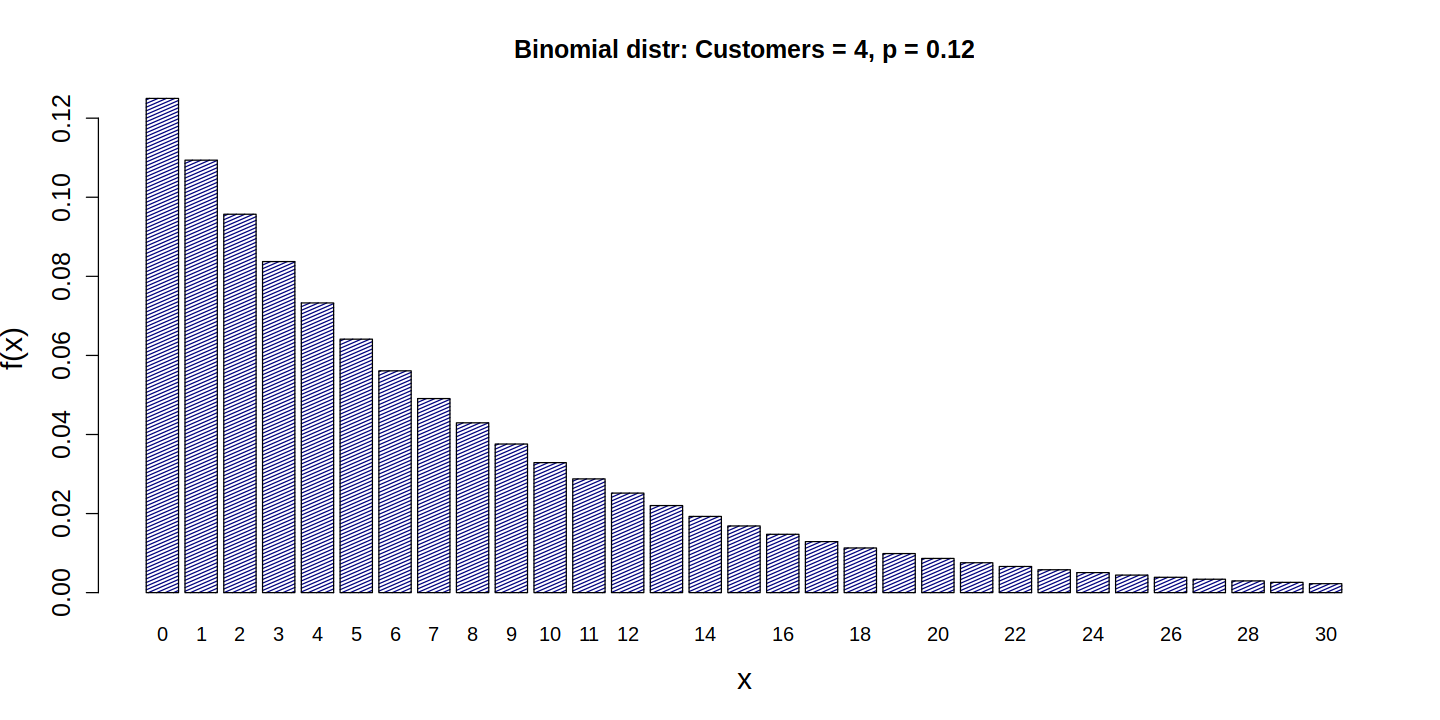

In [36]:
cust <- 4
p <- 1/8
x <- 0:30
ap <- dgeom(x, p)

options(repr.plot.width = 12, repr.plot.height = 6)
barplot( ap,  names.arg = x,   col = "navy",  xlab = "x",  ylab = "f(x)",  density = 40,
  main = sprintf("Binomial distr: Customers = %d, p = %.2f", cust, p),   cex.lab = 1.5,  cex.axis = 1.25, cex.main = 1.25,  cex.sub = 1.5)

---

## MULTINOMIAL DISTRIBUTION

The multinomial distribution is a generalization of the binomial distribution to the case of more than two possible outcomes.  
Let the disjoint outcomes be labeled as $A_1, A_2, \dots, A_r$ with probabilities $P(A_j) = p_j$, where $1 \leq j \leq r$.  
In $n$ independent trials, let $x_j$ denote the number of times outcome $A_j$ occurs, such that $ n = x_1 + x_2 + \dots + x_r $.

The probability mass function is:

$$
P(X_1 = x_1, X_2 = x_2, \dots, X_r = x_r \mid p_1, p_2, \dots, p_r, n) =
\frac{n!}{x_1! x_2! \dots x_r!} p_1^{x_1} p_2^{x_2} \dots p_r^{x_r}
$$

Properties:
$$
\mathbb{E}[x_j] = n p_j
$$

$$
\mathrm{Var}(x_j) = n p_j (1 - p_j)
$$

$$
\mathrm{Cov}(x_i, x_j) = -n p_i p_j
$$

As $n$ becomes large, the multinomial distribution tends toward a multivariate normal distribution.

Note: the marginalization to a single outcome coincides with the binomial distribtuion!

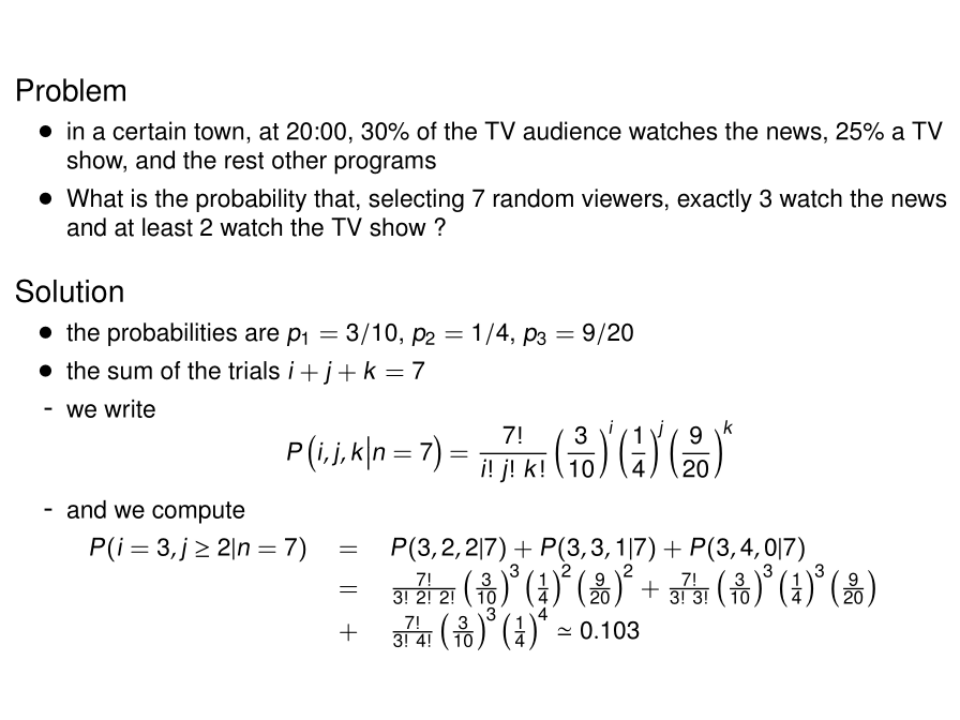

In [40]:
# EXAMPLE:
options(repr.plot.width = 8, repr.plot.height = 6)
img <- readPNG("./images/multinomial_example.png"); grid.raster(img)

---

## POISSON DISTRIBUTION

#### PROCESS INTRODUCTION
The **Poisson Process** is a type of event that might happen over time, with the following assumptions:

- The probability of one count in a small time interval $\Delta t$ is proportional to $\Delta t$: $   P(\text{1 count in } \Delta t) = r \, \Delta t $ where $r$ is the intensity (rate) of the process.
- The probability of two or more events in $\Delta t$ is negligible: $ P(\geq 2 \text{ counts in } \Delta t) \ll P(1 \text{ count}) $. This tells us that the occurrence of two or more events in a small time is practically
impossible.
- Events are independent across disjoint intervals: the probability of n events in [t, t + s] is independent of
how many events have accurred earlier, the process is memoryless.
- Stationarity: given two equal time intervals, ∆t1 and ∆t2 , the probability of n
events in ∆t1 is equal to that in ∆t2


Examples: Accidents occurring at an intersection; Gamma rays emitted from a radioactive source; Customers entering a post office; Earthquakes in Italy.


#### DISTRIBUTION

The **Poisson distribution** (probability mass function in this case) is:

$$ Pois(X=k|\lambda) = \frac{\lambda^k}{k!} e^{-\lambda} $$

where: $\lambda = rT$ is the **expected number of events** in the interval; $k$ is a non-negative integer representing the specific **number of events for which we want to calculate the probability** of occurrence within that interval. We can use this distrib with `dpois(x, lambda)`.

Properties:

$$
\mathbb{E}[X] = \lambda
$$

$$
\mathrm{Var}(X) = \lambda
$$

$$
Pois(X = k) = \frac{\lambda}{k} Pois(X = k - 1)  \quad \quad \text{Recursive identity}
$$

$$
X = X_1 + X_2 + \dots + X_k \sim \text{Poi}(\lambda_1 + \lambda_2 + \dots + \lambda_k) \quad \quad \text{sum of Pois is Pois}
$$

The last equation tells us that the sum of independent Poisson variables is also a Poisson variable with mean value equal to the sum of individual means.  
Asymptotically, for large $\lambda$, the Poisson distribution approximates the normal distribution. The approximation is fairly accurate already at $\lambda \approx 20$.



#### DERIVATION FROM BINOMIAL DISTRIB.

We can derive the Poisson distribution as a limiting case of the Binomial distribution. Taking the limit as $n \to \infty$, $p \to 0$, with $np = \lambda$ held constant, we obtain the Poisson distribution:

  $$
  \lim_{n \to \infty} \text{Bin}(n, p) = \text{Poi}(\lambda)
  $$

---




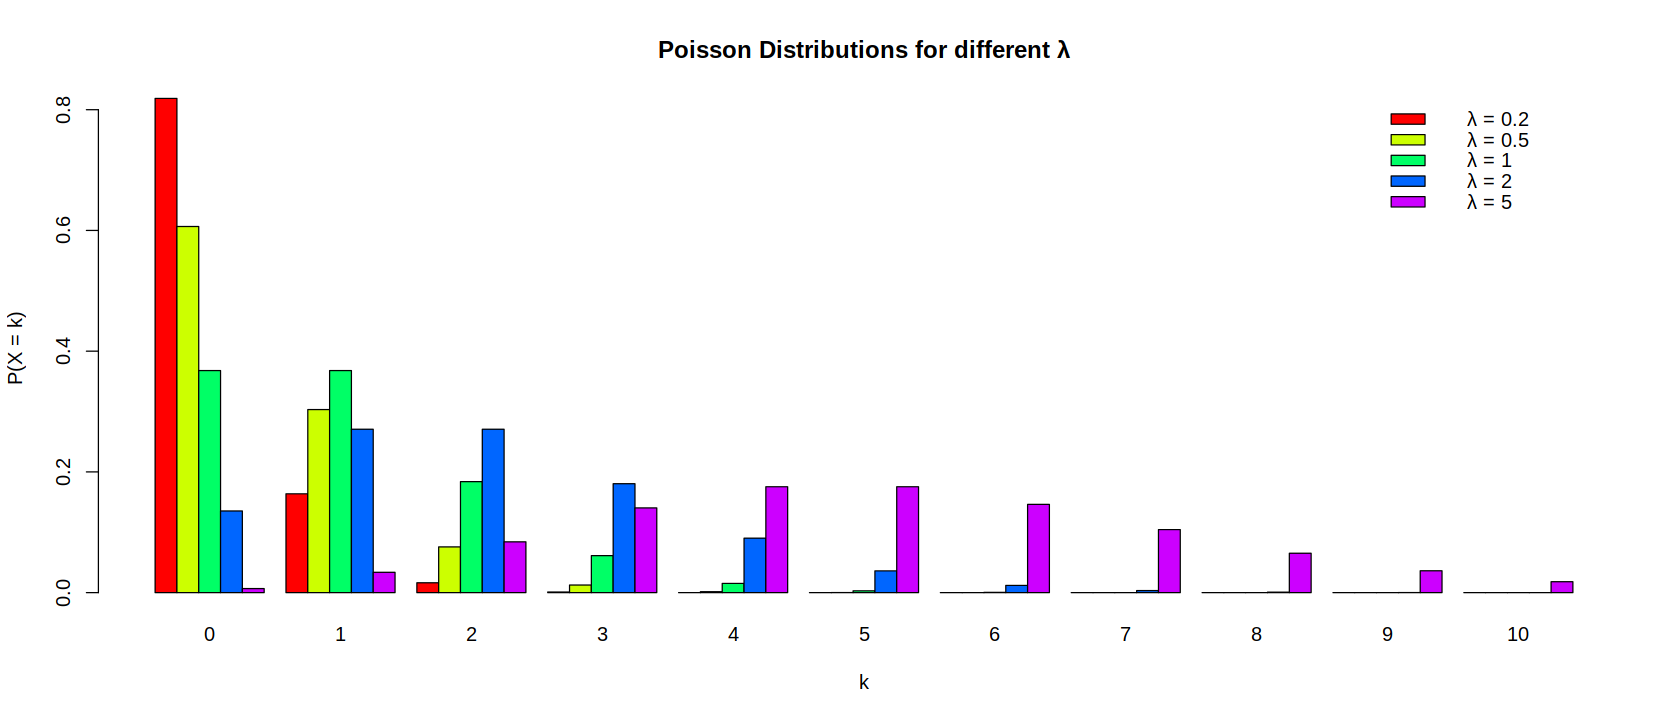

In [18]:
# Lambda values
lam <- c(0.2, 0.5, 1, 2, 5)
x_val <- 0:10

# Compute Poisson probabilities for each lambda
y_mat <- sapply(lam, function(l) dpois(x_val, l))

# Transpose to get each row as a bar group
options(repr.plot.width = 14, repr.plot.height = 6)
barplot(t(y_mat),
        beside = TRUE,
        col = rainbow(length(lam)),
        names.arg = x_val,
        xlab = "k",
        ylab = "P(X = k)",
        main = "Poisson Distributions for different λ",
        legend.text = paste("λ =", lam),
        args.legend = list(x = "topright", bty = "n"))


EXAMPLE:    
A radioactive substance emits on average 3.9 $\alpha$/s per gram. Compute the probability that, in the next second, the number of emitted alpha particles is:
1. at most 6
2. at least 2
3. at least 3 and at most 6

SOLUTION:  
Every gram of element has $n$ atoms. From the information we have, the expected number of events is: $ \mathbb{E}[X] = np = \lambda = 3.9 $
1. Probability that $x \leq 6$:
  $$
  P(x \leq 6) = \sum_{x=0}^{6} \frac{3.9^x}{x!} e^{-3.9}
  $$
2. Probability that $x \geq 2$:
  $$
  P(x \geq 2) = 1 - P(x \leq 1) = 1 - \sum_{x=0}^{1} \frac{3.9^x}{x!} e^{-3.9}
  $$
3. Probability that $3 \leq x \leq 6$:
  $$
  P(3 \leq x \leq 6) = \sum_{x=3}^{6} \frac{3.9^x}{x!} e^{-3.9}
  $$



In [32]:
lam <- 3.9
cat( 'answer 1:', ppois(6,lam) , '\n' )
cat( 'answer 2:', 1-ppois(1,lam) , '\n' )
cat( 'answer 3:', ppois(6,lam) - ppois(2,lam) , '\n' )

answer 1: 0.899483 
answer 2: 0.9008146 
answer 3: 0.6463579 


---

## EXPONENTIAL DISTRIBUTION
The **inter-arrival time of any two consecutive events of a Poisson Process** follows an exponential distribution. Examples are: Time between two customers in a shop; Duration of a phone call; Time between two accidents at an intersection; Time until the next baby is born in a hospital; Time to failure of a chip in a group of fault-free devices.  
The distribution is given by:

$$
Exp(t) =
\begin{cases}
\lambda e^{-\lambda t} & t \geq 0 \\
0 & t < 0
\end{cases}
$$
where $\lambda$ is the poisson rate and $t$ the time.  

The CDF is given by:
$$
F(t) =
\begin{cases}
1 - e^{-\lambda t} & t \geq 0 \\
0 & t < 0
\end{cases}
$$

Properties:
$$
\mathbb{E}[X] = \frac{1}{\lambda}, \quad \text{Var}(X) = \frac{1}{\lambda^2}
$$


EXAMPLE:  
Suppose that every three months, an earthquake of some entity happens in Italy. What is the probability that the next earthquake happens after three but before seven months?

Calling $X$ the time in month until the next earthquake, it will follow an exponential distribution with $\lambda=1/3$ (prob of having an earthquake in a single month, i.e. our time interval):
$$ P(3 < X < 7) = F(7) − F(3) = (1 − e^{7/3}) − (1 − e^{3/3}) $$

In [31]:
lambda <- 1/3
cat( 'answer:', pexp(7,lambda ) - pexp(3,lambda ) , '\n' )

answer: 0.2709075 


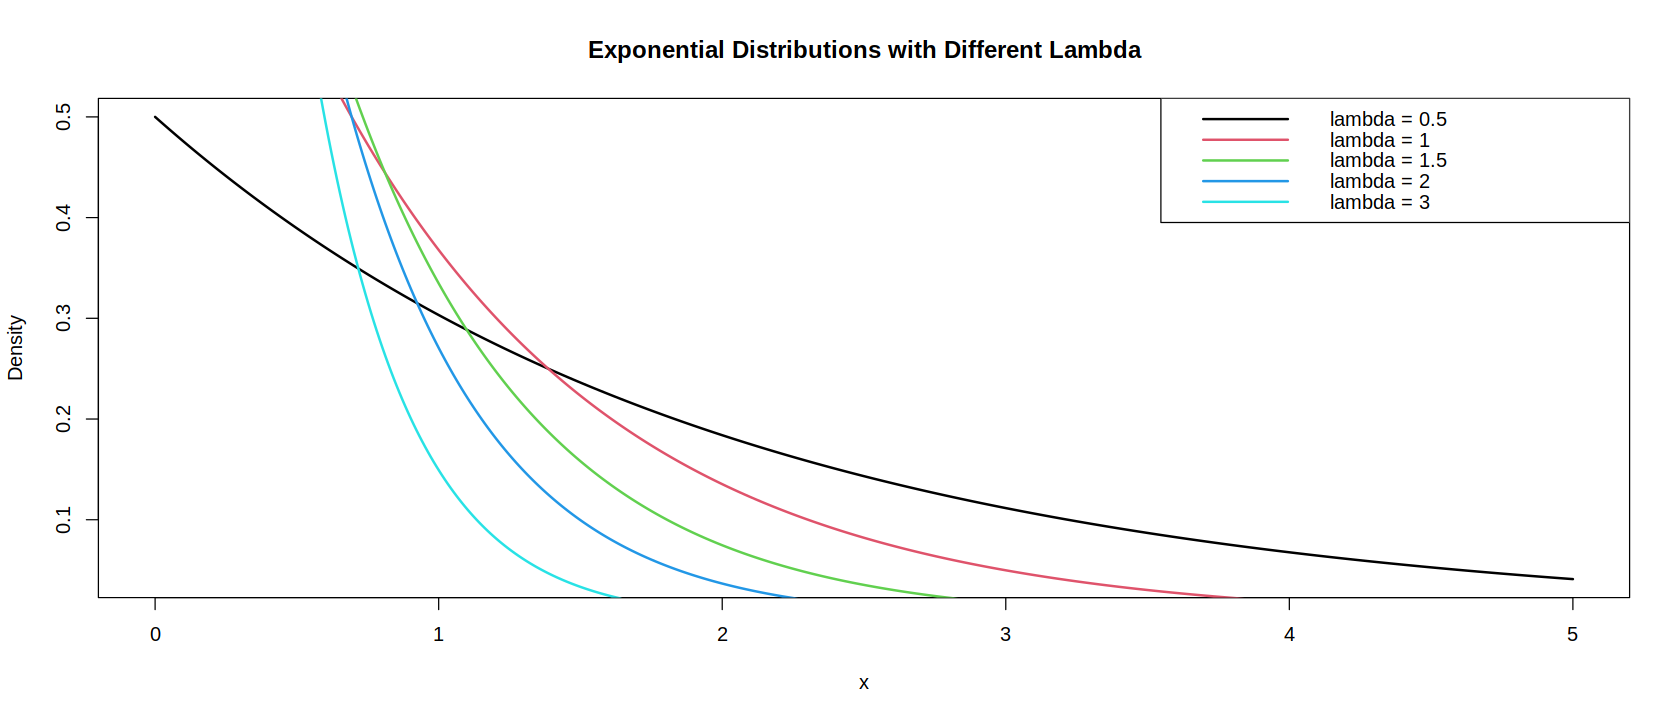

In [41]:
# Define lambda values
lambdas <- c(0.5, 1, 1.5, 2, 3)

# Define a sequence of x values
x_vals <- seq(0, 5, length.out = 500)

# Set up the plot
plot(x_vals, dexp(x_vals, rate = lambdas[1]), type = "l", col = 1,
     ylab = "Density", xlab = "x", lwd = 2,
     main = "Exponential Distributions with Different Lambda")

# Add lines for the other lambda values
for (i in 2:length(lambdas)) {
  lines(x_vals, dexp(x_vals, rate = lambdas[i]), col = i, lwd = 2)
}

# Add a legend
legend("topright", legend = paste("lambda =", lambdas),
       col = 1:length(lambdas), lwd = 2)



---

## SUMMARY OF DISCRETE PMF

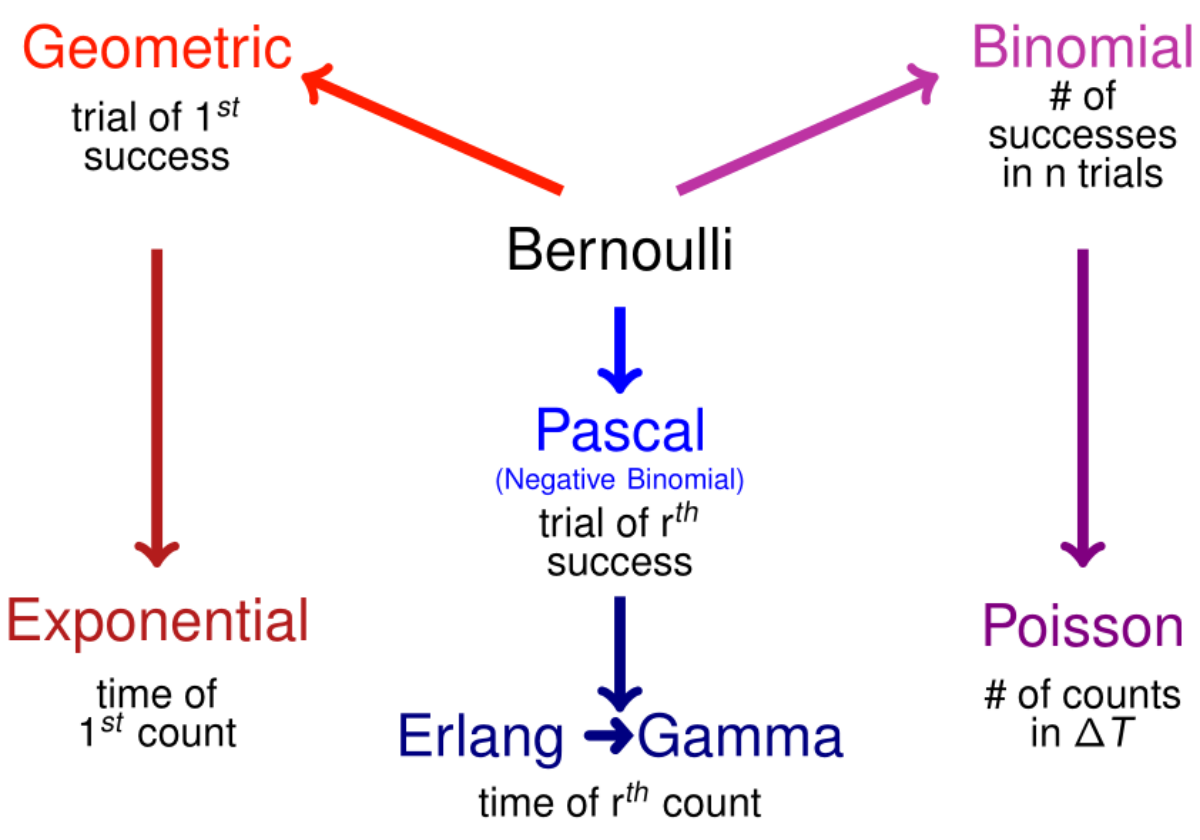

In [44]:
options(repr.plot.width = 10, repr.plot.height = 7)
img <- readPNG("./images/pmf_summary.png"); grid.raster(img)

---

# 03 - CONTINUOUS DISTRIBUTIONS


---

## UNIFORM DISTRIBUTION
A random variable $X \sim U(a, b)$ follows a uniform distribution if his every value is equally probable. Its probability density function (PDF) is given by:

$$
f(X) = 
\begin{cases}
\frac{1}{b - a} & \text{for } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$

The CDF is:

$$
F(X) = 
\begin{cases}
0 & \text{for } x < a \\
\frac{x - a}{b - a} & \text{for } a \leq x \leq b \\
1 & \text{for } x > b
\end{cases}
$$

Properties:

$$
E[X] = \frac{a + b}{2},
\quad
\text{Var}(X) = \frac{(b - a)^2}{12}
$$


---

# 04 - INEQUALITIES
We will discuss three important inequalities. These inequalities are especially useful in **situations where we don't know the full distribution** of a random variable — that is, we don't know the exact shape or form of its probability distribution.

However, if we do know some basic information, such as the expected value (mean) and/or the variance, we can still make meaningful statements about the probabilities of certain events.

These inequalities help us **derive bounds** (upper or lower limits) on probabilities using only that limited information.

## MARKOV'S INEQUALITY
Let $X$ be a non-negative random variable with a finite expected value $\mathbb{E}[X]$.  
Then, for any $a > 0$, the following inequality holds:

$$
\mathbb{P}(X \geq a) \leq \frac{\mathbb{E}[X]}{a}
$$


Markov’s inequality gives an upper bound on the probability that a non-negative random variable exceeds a certain value.  
It is useful when we do not know the full distribution, but do know the expected value.

EXAMPLE:  
Let $\mathbb{E}[X] = 10$. What can we say about the probability that $X \geq 50$?

$$
\mathbb{P}(X \geq 50) \leq \frac{10}{50} = 0.2
$$

So, even without knowing the distribution of $X$, we can say that the chance of $X$ exceeding 50 is at most 20%.


---

## JENSEN'S INEQUALITY
Let $X$ be a random variable with finite mean, and let $\varphi$ be a convex function (i.e. positive second derivative).  
Then Jensen’s inequality states:

$$
\varphi\left( \mathbb{E}[X] \right) \leq \mathbb{E}\left[ \varphi(X) \right]
$$

If $\varphi$ is concave, the inequality is reversed:

$$
\varphi\left( \mathbb{E}[X] \right) \geq \mathbb{E}\left[ \varphi(X) \right]
$$


Jensen’s inequality connects the **expectation of a function** of a random variable to the **function of the expectation**.  
It’s particularly useful in probability, statistics, and information theory.

- For convex functions (e.g., $\varphi(x) = x^2$, $\varphi(x) = e^x$), the "function of the mean" is less than or equal to the "mean of the function".
- For concave functions (e.g., $\log x$, $\sqrt{x}$), the "function of the mean" is greater than or equal to the "mean of the function".

We could say that **a convex function amplifies deviations from the mean**. This means that when you apply a convex function to values away from the mean, it increases their influence more than if you just applied the function to the mean itself.

EXAMPLE:  
Let $X$ be a random variable such that $\mathbb{E}[X] = 2$, and let $\varphi(x) = x^2$, which is convex.

Then: $  \varphi\left( \mathbb{E}[X] \right) =\left( \mathbb{E}[X] \right)^2 = 2^2 = 4 $ and by Jensen’s inequality:

$$
4 = \varphi\left( \mathbb{E}[X] \right) \leq \mathbb{E}[X^2]
$$

This tells us: $\mathbb{E}[X^2] \geq 4$


---

## CHEBYSHEV'S INEQUALITY
Let $X$ be a random variable with finite expected value $\mathbb{E}[X] = \mu$ and finite variance $\mathrm{Var}(X) = \sigma^2$.

Then, for any $k > 0$:

$$
\mathbb{P}(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}
$$

Sometimes it's written in terms of general $\varepsilon > 0$:

$$
\mathbb{P}(|X - \mu| \geq \varepsilon) \leq \frac{\sigma^2}{\varepsilon^2}
$$

Chebyshev’s inequality gives an **upper bound** on the probability that a random variable deviates from its mean by more than $k$ standard deviations ($\sigma$).  
It works regardless of the distribution of $X$ — no assumptions of normality or symmetry are needed. In other words it gives insight into how "concentrated" the distribution is around the mean.


EXAMPLES:  
Let $\mu = \mathbb{E}[X]$ and $\sigma^2 = \mathrm{Var}(X)$.  
Then::

$$ \mathbb{P}(|X - \mu| \geq 2\sigma) \leq \frac{1}{4} = 0.25 \quad \text{for} \quad k=2 $$
$$ \mathbb{P}(|X - \mu| \geq 4\sigma) \leq \frac{1}{16} = 0.06 \quad \text{for} \quad k=4 $$
$$ \mathbb{P}(|X - \mu| \geq 10\sigma) \leq \frac{1}{100} = 0.01 \quad \text{for} \quad k=10 $$

This means for example that no more than 25% of the values lie more than 2 standard deviations away from the mean — for any distribution.